<a href="https://colab.research.google.com/github/Yusra-Zafar/Deep-Learning/blob/main/CNN/CIFAR_10_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 classification using CNN
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

0:	airplane
1:	automobile
2:	bird
3:	cat
4:	deer
5:	dog
6:	frog
7:	horse
8:	ship
9:	truck

**Overfitting problem solutions:**
1. *decreased model complexity*
2. *dropout layers added* --> loss: 1.0915 - accuracy: 0.6149 - val_loss: 0.9570 - val_accuracy: 0.6773
3. *early stopping + dropout* --> loss: 1.0132 - accuracy: 0.6418 - val_loss: 1.0188 - val_accuracy: 0.6440
4. *regularization*

## Importing libraries

In [2]:
import pandas as pd
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

## Loading data

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

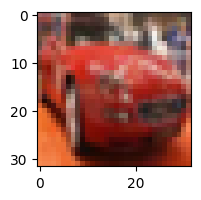

In [5]:
# display a training sample
plt.figure(figsize=(2,2))
plt.imshow(X_train[5])


## Normalize pixels

In [6]:
# normalize pixel values
X_train = X_train/255
X_test = X_test/255

## Building CNN architecture

### Early stopping in case of overfitting

In [7]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=True)

### First take

In [ ]:
## First take
model = Sequential()

# input layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 1
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 2
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 3
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 4
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# flatten
model.add(Flatten())

# dense layer 1
model.add(Dense(units=16, activation='relu'))
# output layer
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 32)         

### Second take

In [ ]:
## Second take: reducing complexity to prevent overfitting
model_1 = Sequential()

# input layer
model_1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 1
model_1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 2
model_1.add(Conv2D(filters=16, kernel_size=(4,4), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 3
model_1.add(Conv2D(filters=16, kernel_size=(4,4), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 4
model_1.add(Conv2D(filters=8, kernel_size=(4,4), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# flatten
model_1.add(Flatten())

# dense layer 1
model_1.add(Dense(units=16, activation='relu'))
# output layer
model_1.add(Dense(units=10, activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 16)          8208      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 4, 4, 16)         

In [ ]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training model_1

In [ ]:
history = model_1.fit(X_train, y_train, batch_size=16, epochs=25, validation_data= (X_test, y_test), callbacks=callback)

Epoch 1/25
3125/3125 [==============================] - 18s 5ms/step - loss: 1.6869 - accuracy: 0.3708 - val_loss: 1.4086 - val_accuracy: 0.4947
Epoch 2/25
3125/3125 [==============================] - 15s 5ms/step - loss: 1.2876 - accuracy: 0.5293 - val_loss: 1.1712 - val_accuracy: 0.5727
Epoch 3/25
3125/3125 [==============================] - 15s 5ms/step - loss: 1.1366 - accuracy: 0.5881 - val_loss: 1.1317 - val_accuracy: 0.5926
Epoch 4/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.0476 - accuracy: 0.6210 - val_loss: 1.0564 - val_accuracy: 0.6223
Epoch 5/25
3125/3125 [==============================] - 15s 5ms/step - loss: 0.9826 - accuracy: 0.6472 - val_loss: 0.9964 - val_accuracy: 0.6443
Epoch 6/25
3125/3125 [==============================] - 16s 5ms/step - loss: 0.9361 - accuracy: 0.6641 - val_loss: 1.0087 - val_accuracy: 0.6388
Epoch 6: early stopping


### Third take

In [ ]:
## Third take: adding dropouts to prevent overfitting
model_2 = Sequential()

# input layer
model_2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 1
model_2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 2
model_2.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 3
model_2.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 4
model_2.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# flatten
model_2.add(Flatten())

# dense layer 1
model_2.add(Dense(units=16, activation='relu'))

# output layer
# adding dropout only before last layer
model_2.add(Dropout(0.5))
model_2.add(Dense(units=10, activation='softmax'))

In [ ]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training model_2

In [ ]:
history = model_2.fit(X_train, y_train, batch_size=16, epochs=25, validation_data= (X_test, y_test), callbacks=callback)

Epoch 1/25
3125/3125 [==============================] - 19s 5ms/step - loss: 1.9675 - accuracy: 0.2355 - val_loss: 1.5582 - val_accuracy: 0.4008
Epoch 2/25
3125/3125 [==============================] - 15s 5ms/step - loss: 1.6345 - accuracy: 0.3683 - val_loss: 1.4222 - val_accuracy: 0.4495
Epoch 3/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.5196 - accuracy: 0.4085 - val_loss: 1.3077 - val_accuracy: 0.5088
Epoch 4/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.4496 - accuracy: 0.4442 - val_loss: 1.2889 - val_accuracy: 0.5294
Epoch 5/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.3959 - accuracy: 0.4689 - val_loss: 1.2354 - val_accuracy: 0.5603
Epoch 6/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.3424 - accuracy: 0.4938 - val_loss: 1.1740 - val_accuracy: 0.5811
Epoch 7/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.3067 - accuracy: 0.5186 - val_loss: 1.2243 - val_ac

### Fourth take

In [11]:
## Fourth take: adding dropout layers
model_3 = Sequential()

# input layer
model_3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))

# hidden layer 1
model_3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 2
model_3.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))

# hidden layer 3
model_3.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 4
model_3.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))

# flatten
model_3.add(Flatten())

# dense layer 1
model_3.add(Dense(units=16, activation='relu'))
# adding dropout after dense layer layer
model_3.add(Dropout(0.2))

# output layer
model_3.add(Dense(units=10, activation='softmax'))

In [12]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model_3.fit(X_train, y_train, batch_size=32, epochs=20, validation_data= (X_test, y_test), callbacks=callback)

Epoch 1/20
1563/1563 [==============================] - 13s 7ms/step - loss: 1.9399 - accuracy: 0.2640 - val_loss: 1.5828 - val_accuracy: 0.4326
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6016 - accuracy: 0.4023 - val_loss: 1.4167 - val_accuracy: 0.4816
Epoch 3/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4681 - accuracy: 0.4601 - val_loss: 1.2506 - val_accuracy: 0.5536
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3880 - accuracy: 0.4959 - val_loss: 1.1656 - val_accuracy: 0.5840
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3276 - accuracy: 0.5224 - val_loss: 1.1594 - val_accuracy: 0.5816
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2698 - accuracy: 0.5503 - val_loss: 1.0963 - val_accuracy: 0.6175
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2258 - accuracy: 0.5650 - val_loss: 1.0843 - val_acc

⬆⬆⬆⬆

**Loss is high. Accuracy is low. But successfull in preventing overfitting.**

## Visualize loss and accuracies

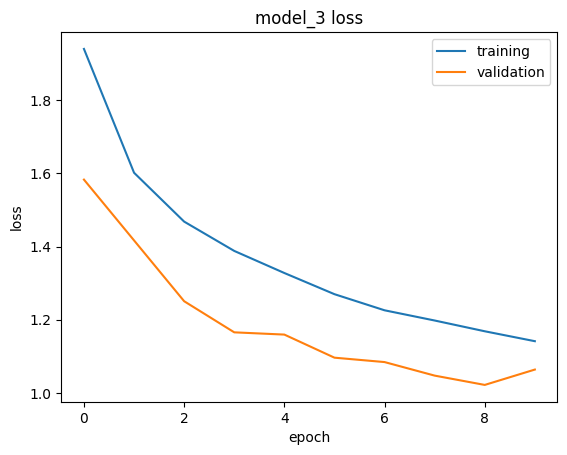

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

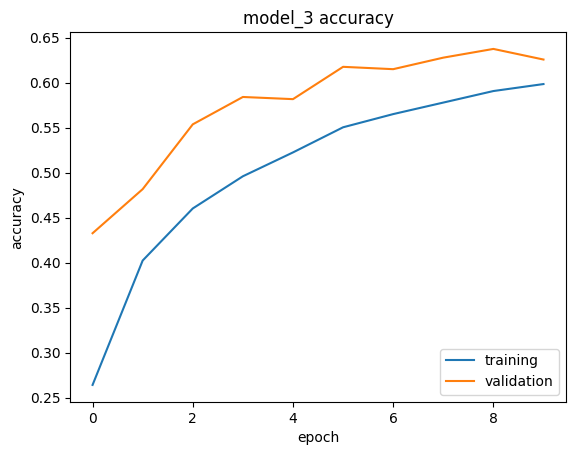

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')

## Prediction

In [26]:
y_pred = model_3.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
y_pred[10]

array([0.11408447, 0.00328077, 0.27149954, 0.06860732, 0.3426299 ,
       0.04812219, 0.04364993, 0.08344309, 0.01826774, 0.006415  ],
      dtype=float32)

In [28]:
# convert probabilites into integers
import numpy as np
y_pred = [np.argmax(i) for i in y_pred]
y_pred[10]

4

In [29]:
# evaluate model
test_loss, test_accuracy = model_3.evaluate(X_test, y_test, verbose=True, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 1.0638 - accuracy: 0.6256


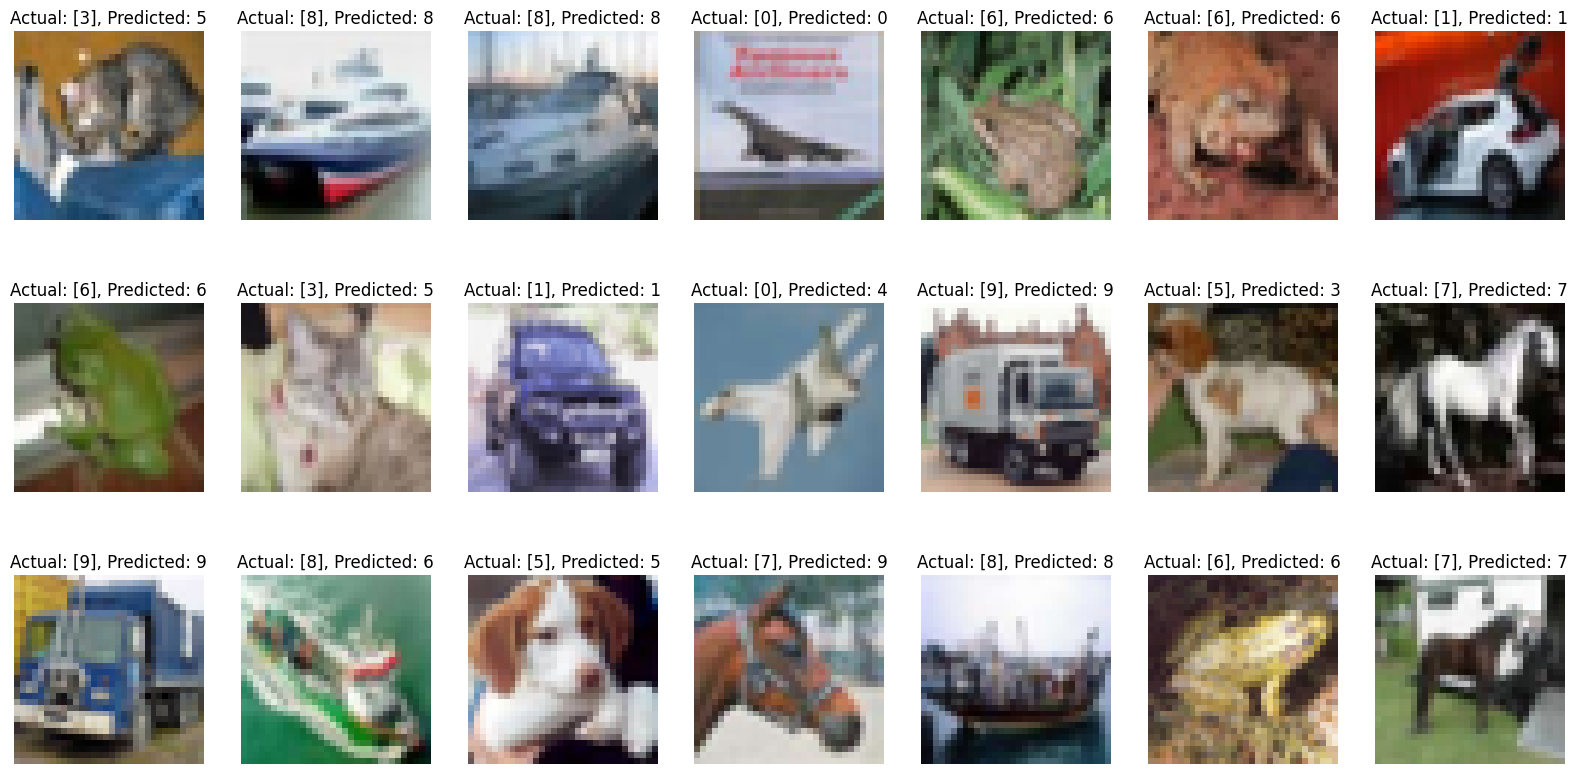

In [30]:
# visualize the actual and predicted classes of images using matplotlib
# class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(20,10))
for i in range(21):
    plt.subplot(3,7,i+1)
    plt.imshow(X_test[i])
    plt.title(f'Actual: {y_test[i]}, Predicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

**- Iterated multiple times for improving the model.**

**- Successful is preventing overfitting by using dropouts, adding multiple hidden layers with less filters instead of less hidden layers with many filters.**